In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
df = pd.read_csv('C://Users//10016032//Desktop//workspace//dataset//cs-training.csv')

In [6]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [12]:
#缺失值
print(df.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [14]:
df = df.fillna(df.median())
print(df.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [17]:
#cut分箱
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df['bin_age'] = pd.cut(df['age'],bins=age_bins).astype(str)

dependent_bin = [-math.inf,2,4,6,8,10,math.inf]
df['bin_NumberOfDependents'] = pd.cut(df['NumberOfDependents'],bins=dependent_bin).astype(str)

dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df['bin_NumberOfTimes90DaysLate'] = pd.cut(df['NumberOfTimes90DaysLate'],bins=dpd_bins)
df['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)

#qcut分箱,q=5
df['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop').astype(str)
df['bin_DebtRatio'] = pd.qcut(df['DebtRatio'],q=5,duplicates='drop').astype(str)
df['bin_MonthlyIncome'] = pd.qcut(df['MonthlyIncome'],q=5,duplicates='drop').astype(str)
df['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop').astype(str)
df['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df['NumberRealEstateLoansOrLines'],q=5,duplicates='drop').astype(str)

In [20]:
bin_cols = [x for x in df.columns.values if x.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [21]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
#     print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [26]:
#IV值进行特征筛选
#选择IV值大于0.1的
# bin_age
# bin_NumberOfTimes90DaysLate
# bin_NumberOfTime30-59DaysPastDueNotWorse
# bin_NumberOfTime60-89DaysPastDueNotWorse
# bin_RevolvingUtilizationOfUnsecuredLines
for f in bin_cols:
    print(f)
    print(cal_IV(df,f,'SeriousDlqin2yrs'))

bin_age
0.2404112030278598
bin_NumberOfDependents
0.014508360076444416
bin_NumberOfTimes90DaysLate
0.4916068573351557
bin_NumberOfTime30-59DaysPastDueNotWorse
0.4924447745701981
bin_NumberOfTime60-89DaysPastDueNotWorse
0.2665587583516951
bin_RevolvingUtilizationOfUnsecuredLines
1.0596188771423887
bin_DebtRatio
0.059487611458096806
bin_MonthlyIncome
0.056234461477147564
bin_NumberOfOpenCreditLinesAndLoans
0.048023155289855055
bin_NumberRealEstateLoansOrLines
0.0120914141106244


In [27]:
def cal_WOE(df,features,target):
    df_new = df
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad'})
        df_woe = df_woe.rename(columns = {target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe = df_woe[[f,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad']/df_woe['bad'].sum()
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        df_woe['woe'] = df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1)
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new

In [28]:
# 根据IV选出来的特征
feature_cols = ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','age','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']
bin_cols = ['bin_RevolvingUtilizationOfUnsecuredLines','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_age','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']
df_woe = cal_WOE(df,bin_cols,'SeriousDlqin2yrs')
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
0,3.463412,5.036574,1.256516,0.838053,0.906658
1,3.463412,0.772730,1.599270,0.838053,0.906658
2,1.054603,0.772730,1.599270,0.838053,0.906658
3,0.420420,0.772730,1.599270,0.838053,0.906658
4,3.463412,0.772730,1.256516,0.838053,0.906658
...,...,...,...,...,...
149995,0.235185,0.772730,0.322341,0.838053,0.906658
149996,1.054603,0.772730,1.256516,0.838053,0.906658
149997,0.420420,0.772730,0.918713,0.838053,0.906658
149998,0.276204,0.772730,1.599270,0.838053,0.906658


In [33]:
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df_tmp = df_woe[[w,b]].drop_duplicates()
    df_tmp.columns = ['woe','bin']
    df_tmp['features'] = f
    df_tmp=df_tmp[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df_tmp])
df_bin_to_woe

,features,bin,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",3.463412
2,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",1.054603
3,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",0.420420
11,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",0.276204
14,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",0.235185
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",5.036574
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.772730
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",7.595036
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",10.348788
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",11.436221


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=996)

In [38]:
model = LogisticRegression(random_state=996).fit(X_train,y_train)

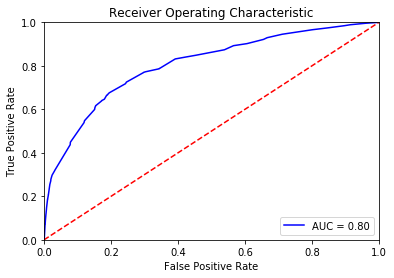

In [39]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data

In [42]:
A = 650
B =72.13
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",-136
1,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",-41
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",-16
3,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",-11
4,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",-9
5,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-63
6,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-10
7,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-95
8,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-130
9,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-143


In [43]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 6   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 40  NumberOfTime60-89DaysPastDueNotWorse   
                                     31  NumberOfTime60-89DaysPastDueNotWorse   
                                     32  NumberOfTime60-89DaysPastDueNotWorse   
                                     39  NumberOfTime60-89DaysPastDueNotWorse   
                                     35  NumberOfTime60-89DaysPastDueNotWorse   
                                     38  NumberOfTime60-89DaysPastDueNotWorse   
                                     34  NumberOfTime60-89DaysPastDueNotWorse   
                                     33  NumberOfTime60-89DaysPastDueNotWorse   
                                     36  NumberOfTime60-89DaysPastDueNotWorse   
                                     37  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              21               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 4   RevolvingUtilizationOfUnsecuredLines   
                                     3   RevolvingUtilizationOfUnsecuredLines   
                                     2   RevolvingUtilizationOfUnsecuredLines   
                                     1   RevolvingUtilizationOfUnsecuredLines   
                                     0   RevolvingUtilizationOfUnsecuredLines   
age                                  17                                   age   
                                     19                                   age   
                                     18                                   age   
                                     15                                   age   
                                     16                                   age   
                                     20                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 6        (-inf, 1.0]    -10  
                                     5         (1.0, 2.0]    -63  
                                     13        (7.0, 8.0]    -82  
                                     14        (8.0, 9.0]    -87  
                                     7         (2.0, 3.0]    -95  
                                     8         (3.0, 4.0]   -130  
                                     9         (4

In [47]:
def str_to_int(s):
    if s == '-inf':
        return -999999999.0
    elif s=='inf':
        return 999999999.0
    else:
        return float(s)
    
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=="("
        right_open = bins[-1]==")"
        binnings = bins[1:-1].split(',')
        in_range = True
        # check left bound
        if left_open:
            if feature_value<= str_to_int(binnings[0]):
                in_range = False   
        else:
            if feature_value< str_to_int(binnings[0]):
                in_range = False   
        #check right bound
        if right_open:
            if feature_value>= str_to_int(binnings[1]):
                in_range = False 
        else:
            if feature_value> str_to_int(binnings[1]):
                in_range = False   
        if in_range:
            return row['Binning']
    return null

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score += selected_record_in_scorecard['Score'].iloc[0]
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df

In [45]:
good_sample = df[df['SeriousDlqin2yrs']==0].sample(5, random_state=1)
good_sample = good_sample[feature_cols]
bad_sample = df[df['SeriousDlqin2yrs']==1].sample(5, random_state=1)
bad_sample = bad_sample[feature_cols]

In [48]:
calculate_score_with_card(good_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
149862,0.000000,0,55,0,0,579
43190,0.003769,0,39,0,0,551
90275,0.000000,0,78,0,0,604
6741,0.013976,0,57,0,0,579
140108,0.089350,0,39,0,0,546


In [49]:
calculate_score_with_card(bad_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
86741,1.000000,0,49,0,0,440
137326,0.612609,2,53,0,0,496
79696,0.608164,5,56,1,0,416
87970,0.964554,1,30,0,1,426
120547,0.940120,0,38,1,1,426
